___
<a href='http://www.kgptalkie.com'><img src='../kgptalkie_strips.png'/></a>
___

<center><em>Copyright by KGPTalkie</em></center>
<center><em>For free ML tutorials, visit us at <a href='http://www.kgptalkie.com'>www.kgptalkie.com</a> and <a href='http://www.youtube.com/kgptalkie'>www.youtube.com/kgptalkie</a> </em></center>

# Sentiment Analysis using Deep Learning

## Build ANN

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-hbuv0iip
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-hbuv0iip
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.0.3-cp36-none-any.whl size=4351 sha256=165acce5a8e65212e3790d7350a663f85c04190153c4ca5b9aaee830e4dc3c34
  Stored in directory: /tmp/pip-ephem-wheel-cache-yo8zxarq/wheels/a8/18/22/90afa4bd43247fb9a75b710a4a3fcd94966c022ce9e3c7d0a6
Successfully built preprocess-kgptalkie


In [3]:
!pip install -U spacy
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 10.0MB 4.5MB/s 
     |████████████████████████████████| 2.1MB 47.0MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 782.7MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.3.1-cp36-none-any.whl size=782936124 sha256=10702e8d2f779745d19b3651c57b4edee9efe88b5e727b456e7b023d5eaca8ad
  Stored in directory: /tmp/pip-ephem-wheel-cache-ioqqsgdx/wheels/ce/4d/1b/bc6cabb6df139c5f0318927be3ae9e51363fb44d6ea328d3f4
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [4]:
# dataset  = https://raw.githubusercontent.com/laxmimerit/NLP-Tutorial-8---Sentiment-Classification-using-SpaCy-for-IMDB-and-Amazon-Review-Dataset/master/datasets/imdb_labelled.txt

In [5]:
import pandas as pd
import numpy as np
import spacy

In [6]:
import preprocess_kgptalkie as ps
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

/usr/local/lib/python3.6/dist-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.5) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.2). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


### Data Preprocessing

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/NLP-Tutorial-8---Sentiment-Classification-using-SpaCy-for-IMDB-and-Amazon-Review-Dataset/master/datasets/imdb_labelled.txt', sep = '\t', header = None)

In [8]:
df.columns = ['reviews', 'sentiment']

In [9]:

df.head()

,reviews,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [10]:
def get_clean(x):
    x = str(x).lower()
    x =  ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_urls(x)
    x =  ps.remove_special_chars(x)
    x = ps.remove_accented_chars(x)
    return x

In [11]:
# import nltk
# nltk.download('punkt')

In [12]:
x = 'some txt Data'

In [13]:
get_clean(x)

'some txt data'

In [14]:
df['reviews'] = df['reviews'].apply(lambda x: get_clean(x))

In [15]:
df.head()

,reviews,sentiment
0,a very very very slowmoving aimless movie abou...,0
1,not sure who was more lost the flat characters...,0
2,attempting artiness with black white and cleve...,0
3,very little music or anything to speak of,0
4,the best scene in the movie was when gerardo i...,1


### Get the word2vec

```
pip install -U spacy

python -m spacy download en_core_web_lg
```

In [16]:
import en_core_web_lg

In [17]:
nlp = en_core_web_lg.load()

In [20]:
def get_vec(x):
  doc = nlp(x)
  vec = doc.vector
  return vec

In [22]:
get_vec('hi hello').shape

(300,)

In [24]:
df['vec'] = df['reviews'].apply(lambda x: get_vec(x))

In [25]:
df.head()

,reviews,sentiment,vec
0,a very very very slowmoving aimless movie abou...,0,"[-0.020821463, 0.08286683, -0.18918808, 0.1395..."
1,not sure who was more lost the flat characters...,0,"[0.07790671, 0.1754548, -0.14305861, -0.021857..."
2,attempting artiness with black white and cleve...,0,"[-0.16572545, 0.0014458576, -0.11687374, -0.09..."
3,very little music or anything to speak of,0,"[-0.09093174, 0.25162372, -0.25681874, 0.15846..."
4,the best scene in the movie was when gerardo i...,1,"[0.08769195, 0.12695198, -0.097915664, -0.0435..."


In [26]:
y = df['sentiment']

In [28]:
X = df['vec'].to_numpy()
X = X.reshape(-1, 1)

In [29]:
df.shape, X.shape

((748, 3), (748, 1))

In [31]:
X = np.concatenate(np.concatenate(X, axis = 0), axis = 0).reshape(-1, 300)

In [32]:
df.shape, X.shape

((748, 3), (748, 300))

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [35]:
X_train.shape, X_test.shape

((598, 300), (150, 300))

In [37]:
np.min(X_train)

-2.7673

### Feature Standardization

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
np.min(X_train)

0.0

In [41]:
np.max(X_train)

1.0000001

### ANN Model Building and Traning

In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [43]:
X.shape[1]

300

In [44]:
model = Sequential()
model.add(Dense(units = 128, activation='relu', input_dim = X.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [45]:
model.compile(optimizer=Adam(lr = 0.00005), loss = 'binary_crossentropy', metrics=['accuracy'])

In [46]:
model.fit(X_train, y_train, batch_size=4, epochs=20)

Epoch 1/20
150/150 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5485
Epoch 2/20
150/150 [==============================] - 0s 3ms/step - loss: 0.6684 - accuracy: 0.6555
Epoch 3/20
150/150 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.6722
Epoch 4/20
150/150 [==============================] - 0s 2ms/step - loss: 0.6377 - accuracy: 0.6789
Epoch 5/20
150/150 [==============================] - 0s 2ms/step - loss: 0.6203 - accuracy: 0.7124
Epoch 6/20
150/150 [==============================] - 0s 2ms/step - loss: 0.5955 - accuracy: 0.7525
Epoch 7/20
150/150 [==============================] - 0s 2ms/step - loss: 0.5751 - accuracy: 0.7542
Epoch 8/20
150/150 [==============================] - 0s 2ms/step - loss: 0.5565 - accuracy: 0.7592
Epoch 9/20
150/150 [==============================] - 0s 2ms/step - loss: 0.5289 - accuracy: 0.7943
Epoch 10/20
150/150 [==============================] - 0s 2ms/step - loss: 0.5134 - accuracy: 0.7726

### Confusion Matrix Plot

In [48]:
# !pip install mlxtend

In [49]:
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [50]:
confusion_matrix(y_test, y_pred)

array([[44, 29],
       [11, 66]])

In [51]:
from mlxtend.plotting import plot_confusion_matrix

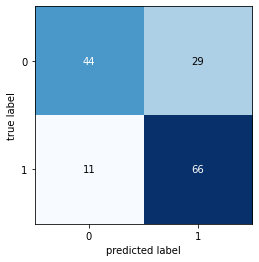

In [52]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred))
plt.show()

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.60      0.69        73
           1       0.69      0.86      0.77        77

    accuracy                           0.73       150
   macro avg       0.75      0.73      0.73       150
weighted avg       0.75      0.73      0.73       150



### Setting Custom Threshold

In [54]:
from sklearn.metrics import precision_score, recall_score

In [55]:
y_pred = model.predict(X_test)

In [59]:
for i in [0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75]:
  classes = [1 if val>i else 0 for val in y_pred]
  print(i, "-->>", precision_score(y_test, classes), recall_score(y_test, classes))

0.3 -->> 0.5966386554621849 0.922077922077922
0.35 -->> 0.6283185840707964 0.922077922077922
0.4 -->> 0.6415094339622641 0.8831168831168831
0.45 -->> 0.67 0.8701298701298701
0.5 -->> 0.6947368421052632 0.8571428571428571
0.55 -->> 0.7045454545454546 0.8051948051948052
0.6 -->> 0.7435897435897436 0.7532467532467533
0.65 -->> 0.7777777777777778 0.7272727272727273
0.7 -->> 0.8095238095238095 0.6623376623376623
0.75 -->> 0.8035714285714286 0.5844155844155844


In [60]:
classes = [1 if val>0.6 else 0 for val in y_pred]

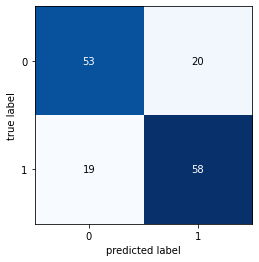

In [61]:
plot_confusion_matrix(confusion_matrix(y_test, classes))
plt.show()

## 1D CNN Model Building and Training

In [67]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv1D, BatchNormalization, Dropout

In [63]:
X_train.shape

(598, 300)

In [64]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [65]:
X_train.shape, X_test.shape

((598, 300, 1), (150, 300, 1))

In [68]:
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 299, 32)           96        
_________________________________________________________________
batch_normalization (BatchNo (None, 299, 32)           128       
_________________________________________________________________
dropout (Dropout)            (None, 299, 32)           0         
_________________________________________________________________
flatten (Flatten)            (None, 9568)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                612416    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [71]:
epochs = 20
model.compile(optimizer=Adam(0.00001), loss = 'binary_crossentropy', metrics= ['accuracy'])
history = model.fit(X_train, y_train, epochs = epochs, validation_data=(X_test, y_test))

Epoch 1/20
19/19 [==============================] - 0s 15ms/step - loss: 0.7052 - accuracy: 0.5585 - val_loss: 0.6904 - val_accuracy: 0.5000
Epoch 2/20
19/19 [==============================] - 0s 5ms/step - loss: 0.6530 - accuracy: 0.6137 - val_loss: 0.6887 - val_accuracy: 0.5200
Epoch 3/20
19/19 [==============================] - 0s 5ms/step - loss: 0.6276 - accuracy: 0.6589 - val_loss: 0.6870 - val_accuracy: 0.5333
Epoch 4/20
19/19 [==============================] - 0s 5ms/step - loss: 0.6084 - accuracy: 0.6722 - val_loss: 0.6849 - val_accuracy: 0.6067
Epoch 5/20
19/19 [==============================] - 0s 5ms/step - loss: 0.5729 - accuracy: 0.6940 - val_loss: 0.6820 - val_accuracy: 0.6600
Epoch 6/20
19/19 [==============================] - 0s 5ms/step - loss: 0.5433 - accuracy: 0.7341 - val_loss: 0.6789 - val_accuracy: 0.6533
Epoch 7/20
19/19 [==============================] - 0s 5ms/step - loss: 0.5252 - accuracy: 0.7425 - val_loss: 0.6752 - val_accuracy: 0.6800
Epoch 8/20
19/19 [=

### Plot Learning Curve

In [75]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [76]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

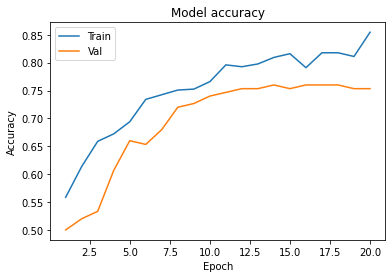

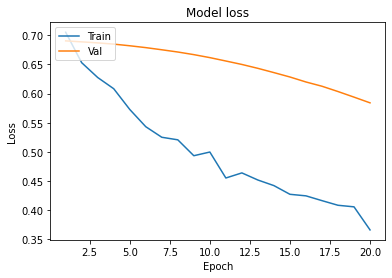

In [77]:
plot_learningCurve(history, epochs)

### Model Load, Store and Testing

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7febe02b8240>)

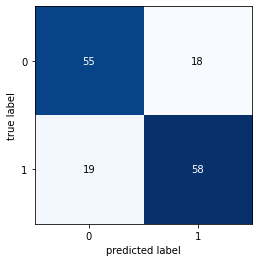

In [81]:
plot_confusion_matrix(confusion_matrix(y_test, model.predict_classes(X_test)))

In [78]:
from tensorflow.keras.models import load_model

In [79]:
model.save('cnn', save_format='h5')

In [80]:
model = load_model('cnn')

In [84]:
X_test[0].shape

(300, 1)

In [111]:
def get_pred(x, model, scaler):
  x = get_clean(x)
  vec = get_vec(x).reshape(1, -1)

  vec = scaler.transform(vec)

  vec = vec.reshape(1, 300, 1)
  
  y_pred = model.predict_classes(vec)

  return y_pred


In [112]:
x = 'it was a nice movie. thanks for making it'
get_pred(x, model, scaler)

array([[1]], dtype=int32)

In [ ]:
# [1, 2, 3] #(,3)
# [[1, 2, 3]] #(1,3)

# Other Resources
|  ML Course | Description |
|:---|:---|
| [**Data Visualization in Python Masterclass™: Beginners to Pro**](https://bit.ly/udemy95off_kgptalkie) |  Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Machine Learning: A Step-by-Step Guide**](https://bit.ly/ml-ds-project) | Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Linear Regression in Machine Learning**](https://bit.ly/regression-python) | Learn to build Linear Regression models using Python and its libraries like Scikit-Learn. |
| [**Introduction to Spacy 3 for Natural Language Processing**](https://bit.ly/spacy-intro) | Learn to build Natural Language Processing models using Python and its libraries like Spacy. |
| [**Advanced Machine Learning and Deep Learning Projects**](https://bit.ly/kgptalkie_ml_projects) | Learn to build Advanced Machine Learning and Deep Learning models using Python and transformer models like BERT, GPT-2, and XLNet. |
| [**Natural Language Processing in Python for Beginners**](https://bit.ly/intro_nlp) | Learn to build Natural Language Processing Projects using Spacy, NLTK, and Gensim, and transformer models like BERT, GPT-2, and XLNet. |
| [**Deployment of Machine Learning Models in Production in Python**](https://bit.ly/bert_nlp) |  Learn to deploy Machine Learning and Deep Learning models using Python and its libraries like Flask, Streamlit, and NGINX. |
| [**R 4.0 Programming for Data Science - Beginners to Pro**](https://bit.ly/r4-ml) | Learn to build Machine Learning and Deep Learning models using R and its libraries like caret, tidyverse, and keras. |
